In [1]:
import torch
from diffusers import StableDiffusionPipeline
import os

# 'runwayml/stable-diffusion-v1-5' is a good starting point.
# For even faster (but lower quality) results, consider models specifically
# optimized for speed like SD-Turbo or LCM models, if available in a CPU-friendly format.
model_id = 'stabilityai/stable-diffusion-2'
model_id = "runwayml/stable-diffusion-v1-5"
model_id = 'Kernel/sd-nsfw'
model_id = 'stable-diffusion-v1-5/stable-diffusion-v1-5'

print(f"Loading Stable Diffusion model: {model_id} to CPU...")
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32, safety_checker=None, )
pipe.to("cpu")
print("Model loaded successfully to CPU.")

2025-08-22 21:27:09.686557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755898029.967139      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755898030.045121      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading Stable Diffusion model: stable-diffusion-v1-5/stable-diffusion-v1-5 to CPU...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Model loaded successfully to CPU.


In [2]:
prompt = "The Ansel Adams photo Moonrise, Hernandez, New Mexico, but in the style of a Japanese woodcut."

Generating image for prompt: 'The Ansel Adams photo Moonrise, Hernandez, New Mexico, but in the style of a Japanese woodcut.'...


  0%|          | 0/50 [00:00<?, ?it/s]

Generation complete!


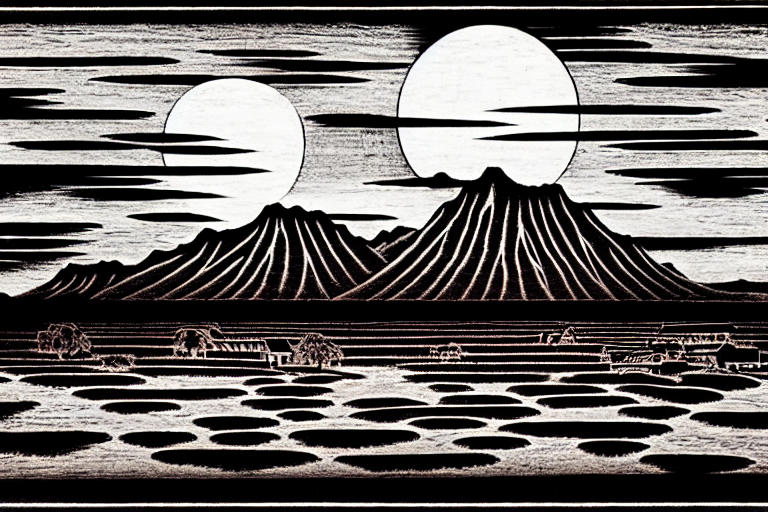

In [3]:
print(f"Generating image for prompt: '{prompt}'...")
num_inference_steps = 50
guidance_scale = 15.0 # Controls how much the prompt influences the generation

image = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    height=512,
    width=768,
).images[0]

print("Generation complete!")
image